In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [50]:
pdf_maths=pd.read_csv('student-mat.csv',sep=';')

In [51]:
def performance(value):
    if value< 33.5:
        return 'Below cut-off'
    else:
        return 'Above cut-off'
    

In [52]:
pdf_maths['total']=pdf_maths['G1']+pdf_maths['G2']+pdf_maths['G3']
pdf_maths['Performance']=pdf_maths['total'].apply(performance)

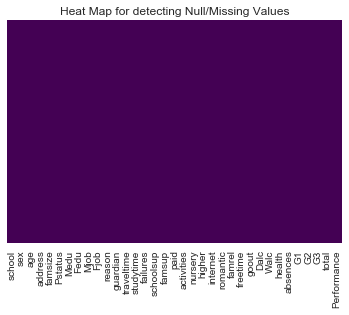

In [6]:
sns.heatmap(pdf_maths.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Heat Map for detecting Null/Missing Values')
plt.savefig('math_null.jpg')

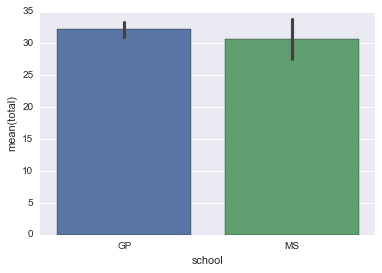

In [7]:
sns.barplot(x='school',y='total',data=pdf_maths)
plt.savefig('math_school.jpg')

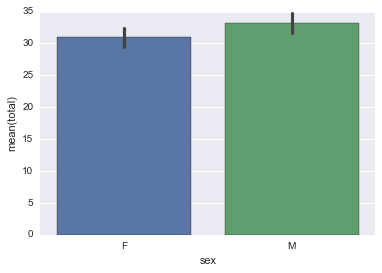

In [8]:
sns.barplot(x='sex',y='total',data=pdf_maths)
plt.savefig('math_sex.jpg')

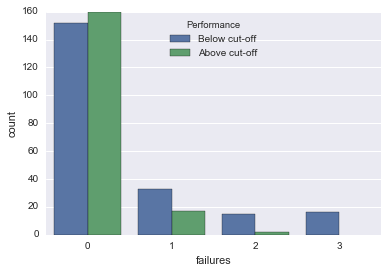

In [53]:
sns.countplot(x='failures',hue='Performance',data=pdf_maths)
plt.savefig('math_perf_fail.jpg')

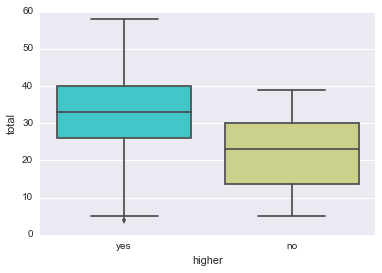

In [10]:
sns.boxplot(x="higher", y="total", data=pdf_maths,palette='rainbow')
plt.savefig('math_total_high.jpg')

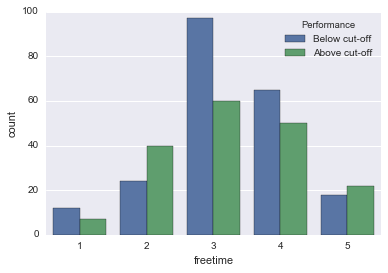

In [54]:
sns.countplot(x='freetime',hue='Performance',data=pdf_maths)
plt.savefig('math_freetime.jpg')

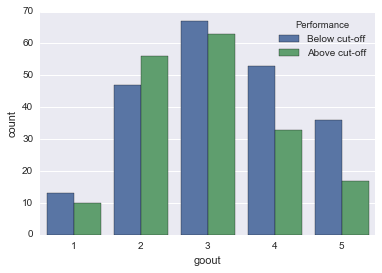

In [55]:
sns.countplot(x='goout',hue='Performance',data=pdf_maths)
plt.savefig('math_perf_goout.jpg')

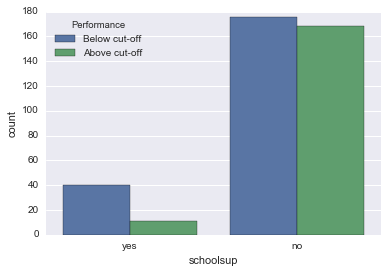

In [56]:
sns.countplot(x='schoolsup',hue='Performance',data=pdf_maths)
plt.savefig('math_ssp.jpg')

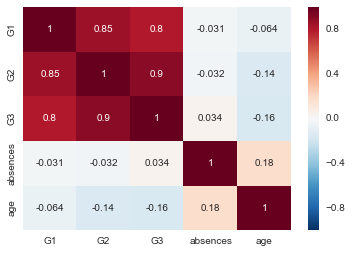

In [14]:
sns.heatmap(pdf_maths[['G1','G2','G3','absences','age']].corr(),annot=True)
plt.savefig('math_correlation.jpg')

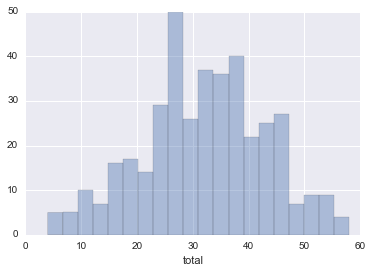

In [48]:
sns.distplot(pdf_maths['total'],kde=False,bins=20)
plt.xlabel='total'
plt.savefig('math_total_hist.jpg')


In [57]:
#Dummy Variables for Categorical Variables
sch=pd.get_dummies(pdf_maths['school'],drop_first=True,prefix='school')
address=pd.get_dummies(pdf_maths['address'],drop_first=True,prefix='address')
fail=pd.get_dummies(pdf_maths['failures'],drop_first=True,prefix='fail')
high=pd.get_dummies(pdf_maths['higher'],drop_first=True,prefix='high')
ssp=pd.get_dummies(pdf_maths['schoolsup'],drop_first=True,prefix='SSP')
guard=pd.get_dummies(pdf_maths['guardian'],drop_first=True,prefix='Guard')
act=pd.get_dummies(pdf_maths['activities'],drop_first=True,prefix='Activity')
fedu=pd.get_dummies(pdf_maths['Fedu'],drop_first=True,prefix='Fedu')
medu=pd.get_dummies(pdf_maths['Medu'],drop_first=True,prefix='Medu')
stdtime=pd.get_dummies(pdf_maths['studytime'],drop_first=True,prefix='studytime')
GT3=pd.get_dummies(pdf_maths['famsize'],drop_first=True,prefix='famsize')
Pstatus_apart=pd.get_dummies(pdf_maths['Pstatus'],drop_first=True,prefix='Pstatus')
medu=pd.get_dummies(pdf_maths['Medu'],drop_first=True,prefix='Medu')
Mjob=pd.get_dummies(pdf_maths['Mjob'],drop_first=True,prefix='Mjob')
Fjob=pd.get_dummies(pdf_maths['Fjob'],drop_first=True,prefix='Fjob')
reason=pd.get_dummies(pdf_maths['reason'],drop_first=True,prefix='reason')
traveltime=pd.get_dummies(pdf_maths['traveltime'],drop_first=True,prefix='traveltime')
famsup=pd.get_dummies(pdf_maths['famsup'],drop_first=True,prefix='famsup')
paid=pd.get_dummies(pdf_maths['paid'],drop_first=True,prefix='paid')
nurs=pd.get_dummies(pdf_maths['nursery'],drop_first=True,prefix='nursery')
internet=pd.get_dummies(pdf_maths['internet'],drop_first=True,prefix='internet')
romantic=pd.get_dummies(pdf_maths['romantic'],drop_first=True,prefix='romantic')
famrel=pd.get_dummies(pdf_maths['famrel'],drop_first=True,prefix='famrel')
freetime=pd.get_dummies(pdf_maths['freetime'],drop_first=True,prefix='freetime')
goout=pd.get_dummies(pdf_maths['goout'],drop_first=True,prefix='goout')
Dalc=pd.get_dummies(pdf_maths['Dalc'],drop_first=True,prefix='Dalc')
Walc=pd.get_dummies(pdf_maths['Walc'],drop_first=True,prefix='Walc')
sex=pd.get_dummies(pdf_maths['sex'],drop_first=True,prefix='sex')
health=pd.get_dummies(pdf_maths['health'],drop_first=True,prefix='health')





In [58]:
#Complete Data
df_cont=pdf_maths[['age','absences','Performance']]
df_complete=pd.concat([df_cont,sch,address,fail,high,ssp,guard,act,fedu,stdtime,GT3,Pstatus_apart,medu,Mjob,Fjob],axis=1)
df_complete=pd.concat([df_complete,reason,traveltime,famsup,paid,nurs,internet,romantic,famrel,freetime,goout,Dalc,Walc,health],axis=1)

In [59]:
#Crossvalidation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [60]:
#Logistic with feature selection - better results
df_log=pd.concat([freetime,ssp,pdf_maths['age'],pdf_maths['Performance']],axis=1)
X=df_log.drop(['Performance'],axis=1)
Y=df_log['Performance']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1010)
lg=LogisticRegression(random_state=1001)
lg.fit(X_train,y_train)
predictions=lg.predict(X_test)
print(classification_report(y_test,predictions))

               precision    recall  f1-score   support

Above cut-off       0.79      0.20      0.32        55
Below cut-off       0.58      0.95      0.72        64

  avg / total       0.68      0.61      0.54       119



In [61]:
#Training and Testing data for RF and Full Logistic 
X=df_complete.drop(['Performance'],axis=1)
Y=df_complete['Performance']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1010)

In [62]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(X_train,y_train)
predict=lg.predict(X_test)
print(classification_report(y_test,predict))


               precision    recall  f1-score   support

Above cut-off       0.68      0.58      0.63        55
Below cut-off       0.68      0.77      0.72        64

  avg / total       0.68      0.68      0.68       119



In [63]:
#Random Forest

rfc=RandomForestClassifier(n_estimators=199,max_features=2,random_state=1010)
rfc.fit(X_train,y_train)
predictions=rfc.predict(X_test)
print(classification_report(y_test,predictions))

               precision    recall  f1-score   support

Above cut-off       0.63      0.47      0.54        55
Below cut-off       0.63      0.77      0.69        64

  avg / total       0.63      0.63      0.62       119



In [67]:
#Optimizing Random FOrest
for n in range(51,151): 
    for i in range(2,7):
        rfc=RandomForestClassifier(n_estimators=n,max_features=i,random_state=1001)
        rfc.fit(X_train,y_train)
        pred=rfc.predict(X_test)
        y_test=np.array(y_test)
        acc=np.sum((y_test==pred)& (y_test=='Above cut-off'))
        if(acc>30):
            print(n,i)
            print(acc)

      

52 3
31
52 4
31
54 4
31
56 3
31


In [68]:
#Random Forest Best
rfc=RandomForestClassifier(n_estimators=52,max_features=3,random_state=1001)
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
y_test=np.array(y_test)
print(classification_report(y_test, rfc.predict(X_test)))

               precision    recall  f1-score   support

Above cut-off       0.70      0.56      0.63        55
Below cut-off       0.68      0.80      0.73        64

  avg / total       0.69      0.69      0.68       119

